In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  


In [2]:
main_dir = r'/home/yiting/Documents/Shape_analysis/dgcnn_vh'
dataset_name = 'vhObject'
vh_cat = 'all'
data = np.load(os.path.join(main_dir, f"dgcnn_cls_{vh_cat}.npy"), allow_pickle=True).item()

In [ ]:
####### Histogram of prediction  #######
# to-do-list:
# label each class 



# Plotting the histogram
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
bins = np.arange(0, 40, 1)  
plt.hist(modelnet_pred, bins=bins, color='blue', edgecolor='black', alpha=0.7)  # 'bins' sets the number of bins

# Customizing the plot
plt.title('Histogram of prediction (' + dataset_name + ', ' + category_name + ')')  
plt.xlabel('ModelNet40 class')  
plt.ylabel('Number of objects')  
plt.xlim(0,40)
# Show the grid for better readability
# plt.grid(True)

# Save the plot as an image (optional)
plt.savefig(os.path.join(main_dir, dataset_name, category_name,'histogram_prediction.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

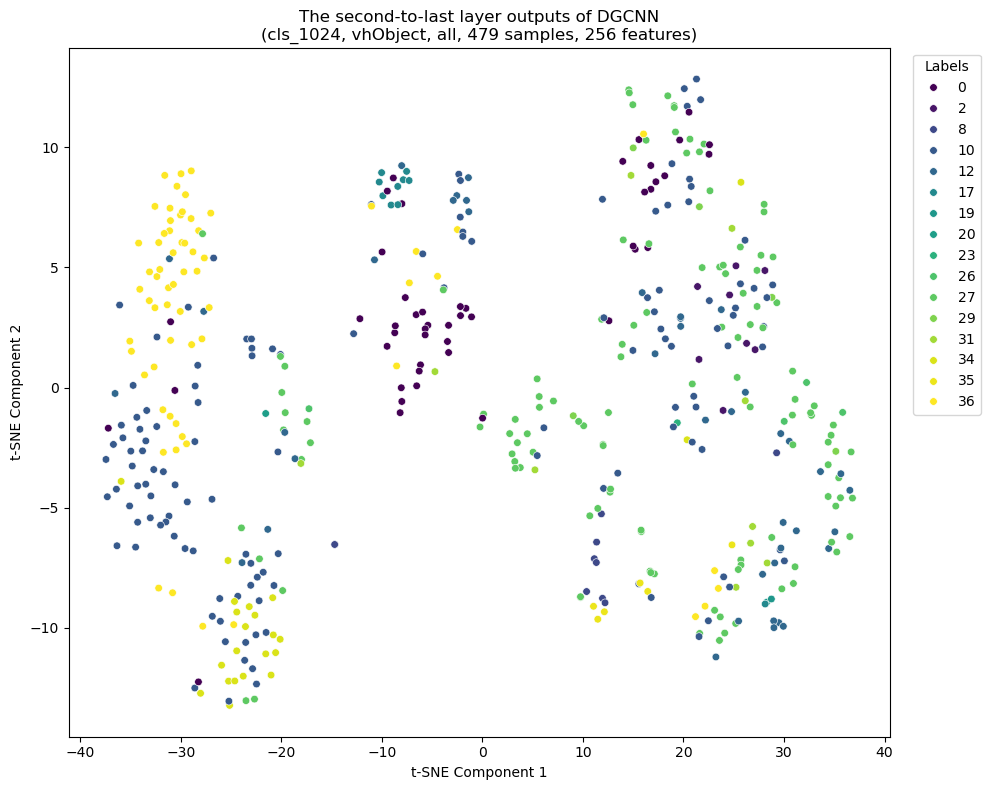

In [3]:
####### 2D tSNE plot #######
# Step 1: Perform t-SNE
features = data['second-to-last_layer_outputs']
vh_label = data['vhObject_cat']
class_id_all = data['class_id']
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
features_tsne = tsne.fit_transform(features)

# Step 2: Create a scatter plot with labels for coloring
plt.figure(figsize=(10, 8))
# label by vh categories or modelnet40 classes
# sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=vh_label, palette='viridis', s=30, legend='full')
sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=class_id_all, palette='viridis', s=30, legend='full')

# Customize plot
plt.title('The second-to-last layer outputs of DGCNN\n(cls_1024, ' + dataset_name + ', ' + 
          vh_cat + ', ' + str(features.shape[0]) + ' samples, ' + str(features.shape[1]) + ' features)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(fontsize = 10,title='Labels', bbox_to_anchor=(1.02, 1), loc='upper left')  # Optional legend positioning
plt.tight_layout()  # Adjust layout to make room for legend

# Step 3: Save the figure
plt.savefig(os.path.join(main_dir, "results", f"tsne_dgcnn_cls_1024_second-to-last_{vh_cat}_modelnet40.png"), bbox_inches='tight')



In [ ]:
%matplotlib widget


In [ ]:
####### 3D tSNE plot #######
# Enable interactive notebook mode
%matplotlib widget

# Step 1: Perform t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42, perplexity=30)
features_tsne = tsne.fit_transform(features)

# Step 2: Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot using the 3D t-SNE components
scatter = ax.scatter(features_tsne[:, 0], features_tsne[:, 1], features_tsne[:, 2], 
                     c=vh_label, cmap='viridis', s=30)

# Customize plot
ax.set_title('The second-to-last layer outputs of DGCNN\n(cls_1024, ' + dataset_name + ', ' + 
             vh_cat + ', ' + str(features.shape[0]) + ' samples, ' + str(features.shape[1]) + ' features)',
               fontsize=12)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

# Set the viewing angle (rotate the plot)
ax.view_init(elev=30, azim=50)  # Rotate: Elevation 30, Azimuth 120

# Step 3: Add color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Labels')

# Step 4: Save the 3D t-SNE plot
output_path = os.path.join(main_dir, "results", f"3d_tsne_dgcnn_cls_1024_second-to-last_{vh_cat}.png")
os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Ensure the directory exists
plt.savefig(output_path, bbox_inches='tight')

plt.show()